In [48]:
library(car)
library(lmtest)
library(sandwich)
library(ggplot2)

In [3]:
setwd('~/Documents/MIDS/W271/week5')

In [26]:
# Part 1

In [4]:
df <- load('saratoga.Rdata')

In [5]:
ls()

[1] "df"       "saratoga"

In [6]:
saratoga

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

Price Living.Area Baths Bedrooms Fireplace Acres Age
1    142212        1982   1.0        3        No  2.00 133
2    134865        1676   1.5        3       Yes  0.38  14
3    118007        1694   2.0        3       Yes  0.96  15
4    138297        1800   1.0        2       Yes  0.48  49
5    129470        2088   1.0        3       Yes  1.84  29
6    206512        1456   2.0        3        No  0.98  10
7     50709         960   1.5        2        No  0.01  12
8    108794        1464   1.0        2        No  0.11  87
9     68353        1216   1.0        2        No  0.61 101
10   123266        1632   1.5        3        No  0.23  14
11   309808        2270   2.5        3       Yes  4.05   9
12   157946        1804   2.5        3       Yes  0.43   0
13    80248        1600   1.5        3        No  0.36  16
14   135708        1460   2.0        2        No  0.18  17
15   173723        1548   2.0        3       Yes  0.36   0
16   140510        1590   2.5        3       Yes  0.42   0
17   122221        1170   1.5        4        No  3.00  26
18   151917        1510   2.5        3       Yes  0.39   0
19   235105        2299   2.5        4       Yes  0.80   6
20   259999        2577   2.5        4       Yes  0.77   1
21   211517        2328   2.5        4       Yes  0.85  10
22   102068        1172   2.5        3       Yes  0.85  73
23   128440        1554   1.5        3        No  4.87 103
24   115659        1242   2.0        3       Yes  0.72  30
25   145583        1376   2.0        3       Yes  0.46  25
26   116289        1107   1.0        3       Yes  0.46  43
27   238792        2250   2.5        4       Yes  2.48  10
28   221925        2472   2.0        4        No  0.62 183
29   310696        2843   2.5        4       Yes  0.71   5
30   139079        1400   1.5        3       Yes  1.00  35
31   109578        1342   1.0        2       Yes  0.57  41
32    65325         813   1.0        2        No  0.39  68
33    89893        1480   2.5        2       Yes  0.29  14
34    87588        1392   1.0        2        No  0.24  17
35   132311        1512   1.5        3       Yes  0.25  13
36   131411        1512   1.5        3       Yes  0.05  13
37   158863        1696   2.5        3       Yes  0.71   5
38   130490        1595   2.0        3       Yes  0.22   6
39    88207        1480   1.5        3        No  0.07  14
40   178767        2291   2.5        4       Yes  0.10   0
41   148246        1391   2.0        3        No  0.04  12
42   205073        2501   2.5        4        No  0.07   0
43   185323        1662   2.0        3        No  0.50   0
44    71904         957   1.0        3        No  0.19  45
45    82556        1480   1.5        3       Yes  0.10  14
46   199684        2275   2.5        4        No  2.17   0
47   122221        1440   1.0        3       Yes  2.12  32
48    81762        1008   1.0        3        No  0.33  41
49    84291        1480   2.5        2       Yes  0.07  14
50   206512        2116   2.5        3       Yes  2.17   0
51   105363        1100   1.0        3       Yes  0.20  93
52    45004         960   1.0        2        No  0.54  11
53    62105        1228   1.0        2        No  0.31  53
54   103508        1560   1.5        3       Yes  0.88  16
55   157513        2164   2.0        3       Yes  0.69 183
56    79893        2634   2.5        4        No  0.24  83
57    88770        1000   1.0        3        No  0.52  91
58   115312         912   1.0        2        No  0.46  14
59   118952        1572   1.5        3        No  1.61  16
60   103861        1700   1.0        3       Yes  0.46  25
61   112649        1350   1.5        3        No  0.46  26
62   127385        1416   1.5        3        No  0.37  11
63   153129        1560   2.0        3       Yes  1.00   4
64   143808        1572   1.5        3        No  0.46   7
65   133067        1326   2.0        4        No  0.46   7
66   226742        1989   2.0        3       Yes  1.00 247
67    98652        1158   1.5        3        No  0.8

In [7]:
model1 <- lm(Price ~ Living.Area, data=saratoga)

In [22]:
summary(model1)


Call:
lm(formula = Price ~ Living.Area, data = saratoga)

Residuals:
    Min      1Q  Median      3Q     Max 
-281313  -25387   -4307   17855  403357 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3086.422   4695.862  -0.657    0.511    
Living.Area    94.445      2.397  39.407   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53840 on 1060 degrees of freedom
Multiple R-squared:  0.5943,	Adjusted R-squared:  0.5939 
F-statistic:  1553 on 1 and 1060 DF,  p-value: < 2.2e-16


In [8]:
saratoga$fitted <- model1$fitted.values
saratoga$residuals <- model1$residuals

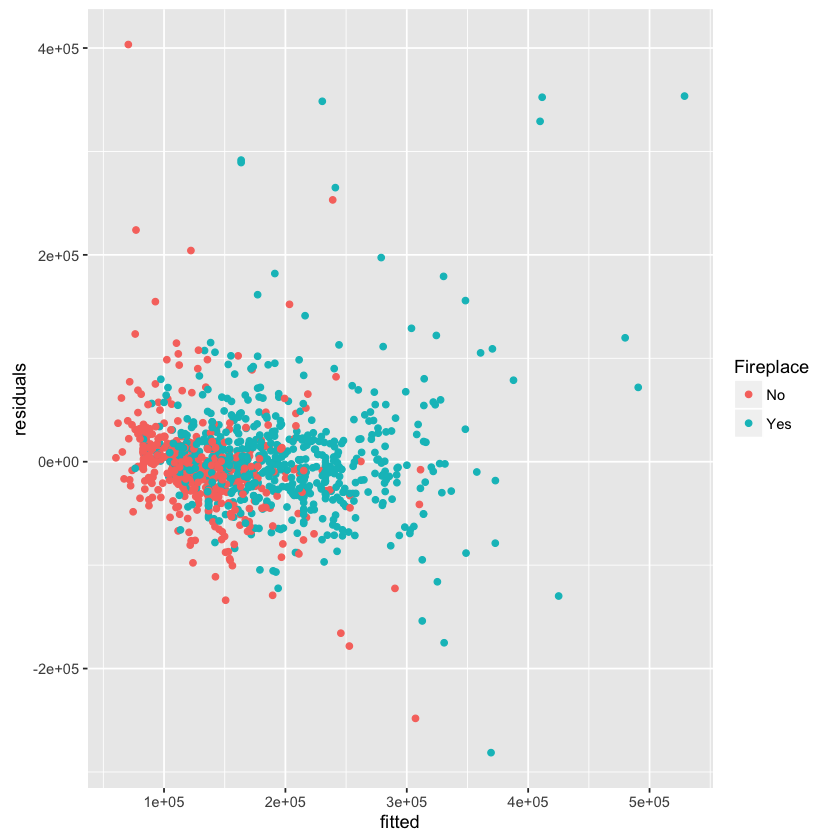

In [14]:
ggplot(saratoga, aes(x=fitted, y=residuals, colour = Fireplace)) + geom_point()

In [ ]:
# The plot shows a grouping which indicates that Fireplace should probably be a part of the model

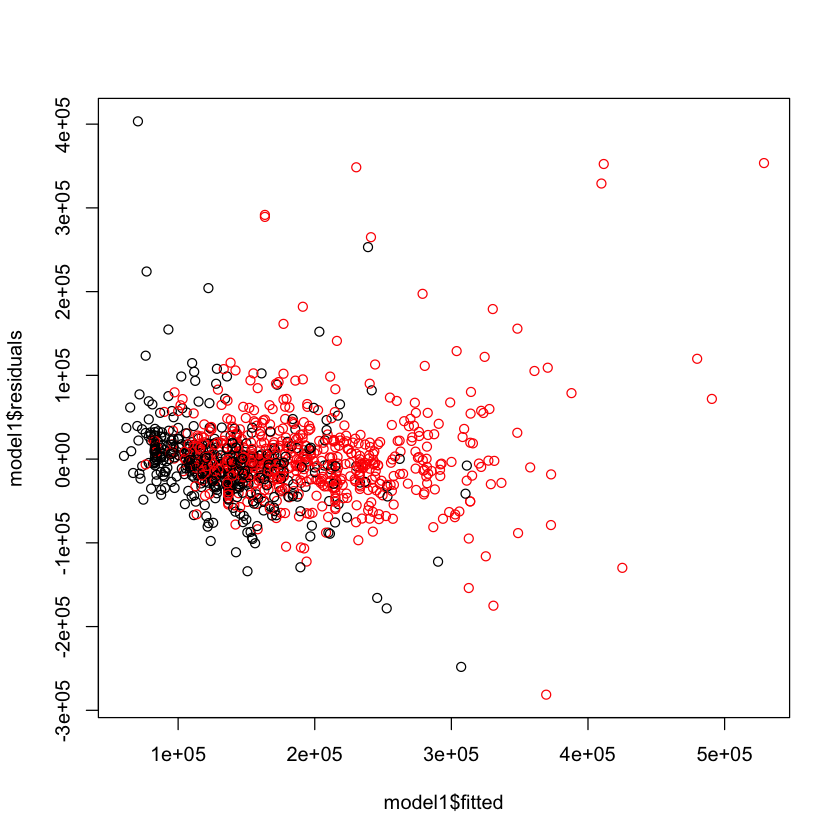

In [17]:
plot(model1$residuals ~ model1$fitted, col=saratoga$Fireplace)

In [18]:
tapply(model1$residuals, saratoga$Fireplace, FUN=mean)

No       Yes 
-4544.428  3055.860

In [19]:
coeftest(model1, vcov=vcovHC)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3086.4215  8271.2250 -0.3732   0.7091    
Living.Area    94.4452     4.8483 19.4801   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
linearHypothesis(model1, 'Living.Area=100', vcov=vcovHC)

Linear hypothesis test

Hypothesis:
Living.Area = 100

Model 1: restricted model
Model 2: Price ~ Living.Area

Note: Coefficient covariance matrix supplied.

  Res.Df Df      F Pr(>F)
1   1061                 
2   1060  1 1.3127 0.2522

In [25]:
# how different from 100? Instead of the coeff = 0 which is what is usually tested, what about is it 
# different from something else
# (ESTIMATE - H0)/SE from the model
# degrees of freedom = 1062 data points - 2 estimates = 1060
# SE comes from the regular model SE - don't necessarily need robust errors because we can see from the residuals vs. 
# fitted the constant variance seems to be satisfied.
tRatio = (94.445 - 100) / 2.397
pt(tRatio, 1060)

# the above gives us the p-value

[1] 0.01033367

In [27]:
# Part 2

In [28]:
model2 <- lm(Price ~ Living.Area + Fireplace, data=saratoga)

In [29]:
summary(model2)


Call:
lm(formula = Price ~ Living.Area + Fireplace, data = saratoga)

Residuals:
    Min      1Q  Median      3Q     Max 
-278295  -25164   -4637   17568  405738 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2895.994   4684.114  -0.618   0.5365    
Living.Area     91.148      2.713  33.591   <2e-16 ***
FireplaceYes  9793.733   3814.881   2.567   0.0104 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53700 on 1059 degrees of freedom
Multiple R-squared:  0.5968,	Adjusted R-squared:  0.5961 
F-statistic: 783.9 on 2 and 1059 DF,  p-value: < 2.2e-16


In [30]:
str(saratoga)

'data.frame':	1062 obs. of  9 variables:
 $ Price      : num  142212 134865 118007 138297 129470 ...
 $ Living.Area: num  1982 1676 1694 1800 2088 ...
 $ Baths      : num  1 1.5 2 1 1 2 1.5 1 1 1.5 ...
 $ Bedrooms   : num  3 3 3 2 3 3 2 2 2 3 ...
 $ Fireplace  : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 1 1 1 1 ...
 $ Acres      : num  2 0.38 0.96 0.48 1.84 0.98 0.01 0.11 0.61 0.23 ...
 $ Age        : num  133 14 15 49 29 10 12 87 101 14 ...
 $ fitted     : num  184104 155204 156904 166915 194115 ...
 $ residuals  : num  -41892 -20339 -38897 -28618 -64645 ...
 - attr(*, "na.action")=Class 'omit'  Named int 129
  .. ..- attr(*, "names")= chr "129"


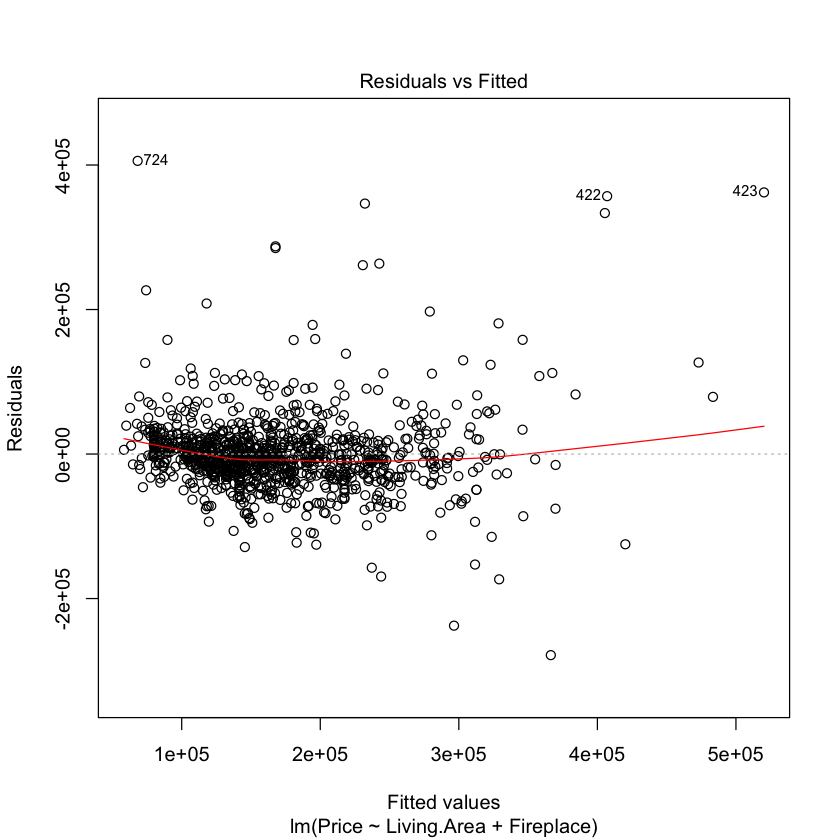

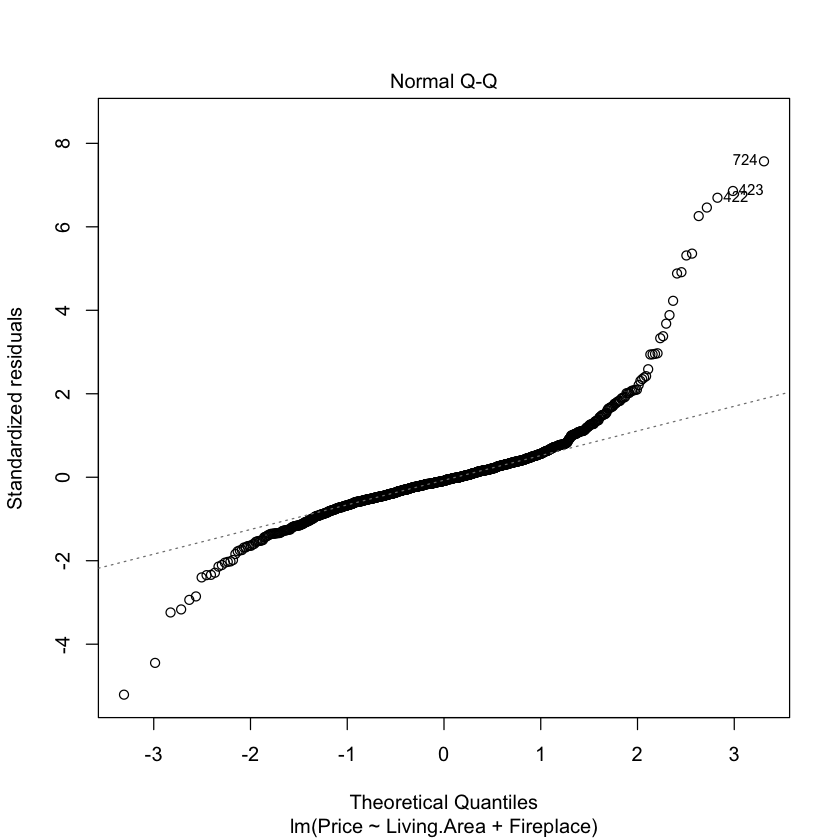

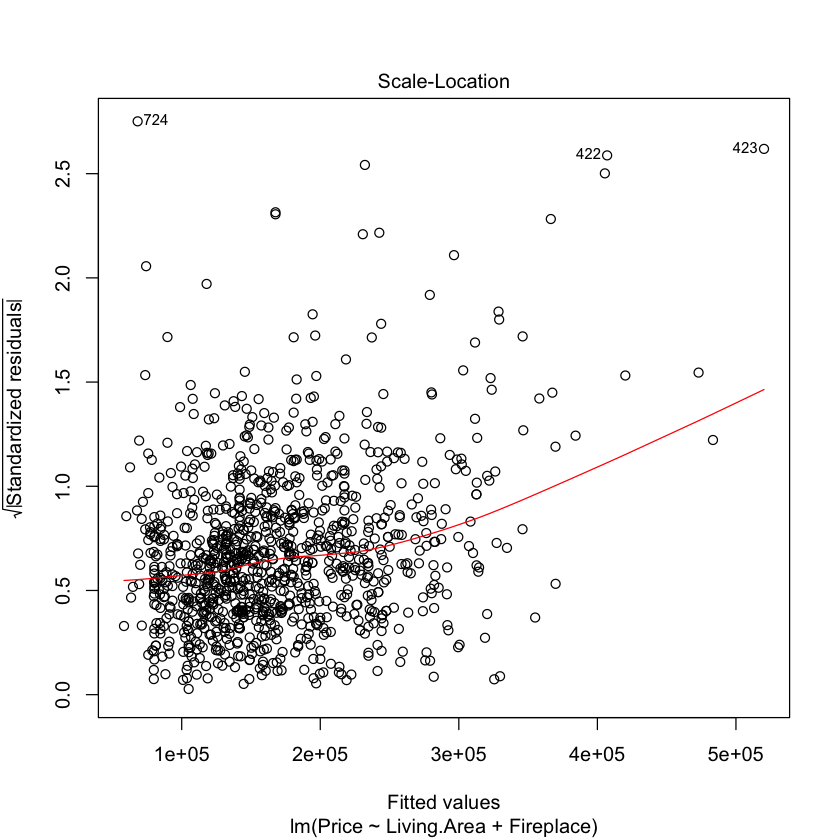

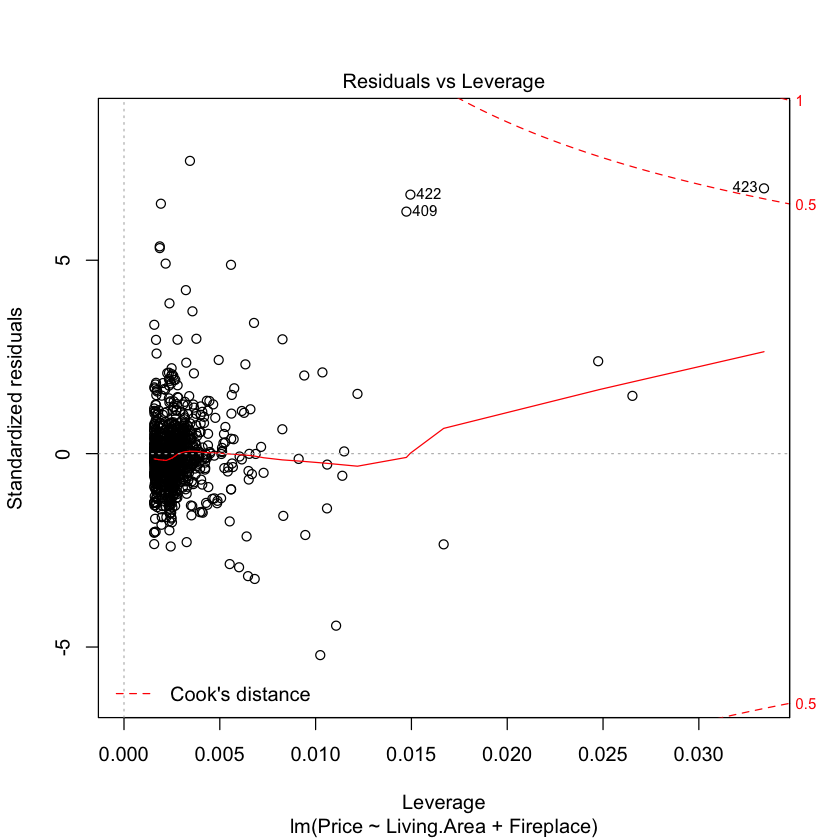

In [37]:
plot(model2)

Warning message:
In plot.window(...): "colour" is not a graphical parameterWarning message:
In plot.xy(xy, type, ...): "colour" is not a graphical parameterWarning message:
In axis(side = side, at = at, labels = labels, ...): "colour" is not a graphical parameterWarning message:
In axis(side = side, at = at, labels = labels, ...): "colour" is not a graphical parameterWarning message:
In box(...): "colour" is not a graphical parameterWarning message:
In title(...): "colour" is not a graphical parameter

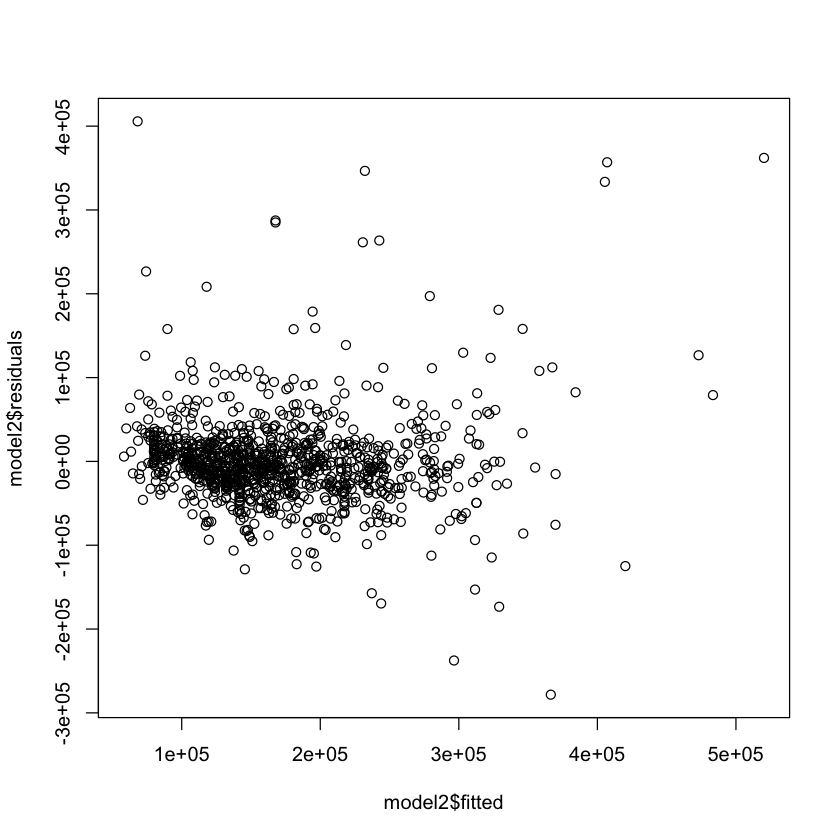

In [38]:
plot(model2$residuals ~ model2$fitted, colour = saratoga$Fireplace)

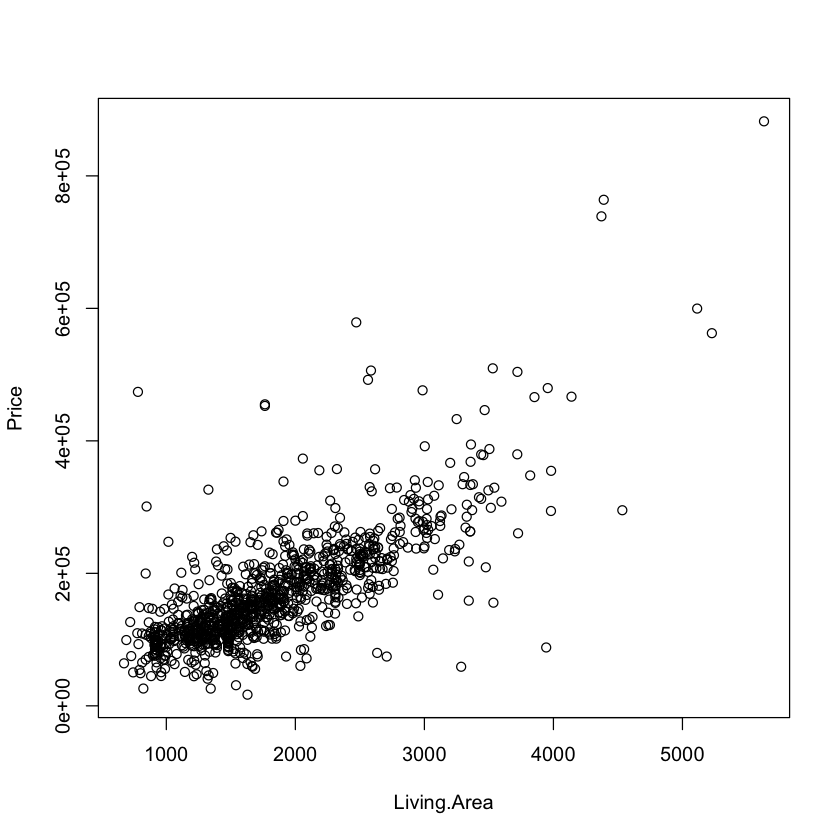

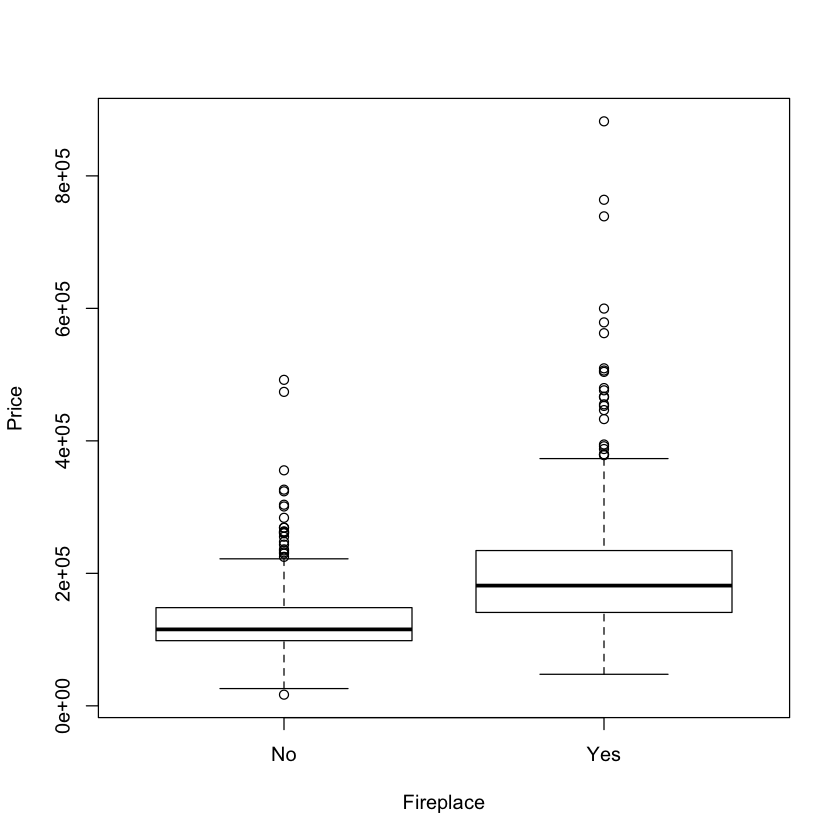

In [53]:
plot(Price ~ Living.Area + Fireplace, data=saratoga)


In [36]:
for (i in 1:2) abline(a=cof[i], b=cof[2+i])

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [ ]:
# Part 3

In [40]:
model3 <- lm(Price ~ Living.Area + Fireplace + Living.Area * Fireplace, data=saratoga)

In [41]:
summary(model3)


Call:
lm(formula = Price ~ Living.Area + Fireplace + Living.Area * 
    Fireplace, data = saratoga)

Residuals:
    Min      1Q  Median      3Q     Max 
-295075  -25197   -4481   17209  385108 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               42255.635   8467.775   4.990 7.05e-07 ***
Living.Area                  59.711      5.622  10.622  < 2e-16 ***
FireplaceYes             -54498.353  10794.441  -5.049 5.23e-07 ***
Living.Area:FireplaceYes     40.545      6.384   6.351 3.18e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52730 on 1058 degrees of freedom
Multiple R-squared:  0.6116,	Adjusted R-squared:  0.6105 
F-statistic: 555.4 on 3 and 1058 DF,  p-value: < 2.2e-16


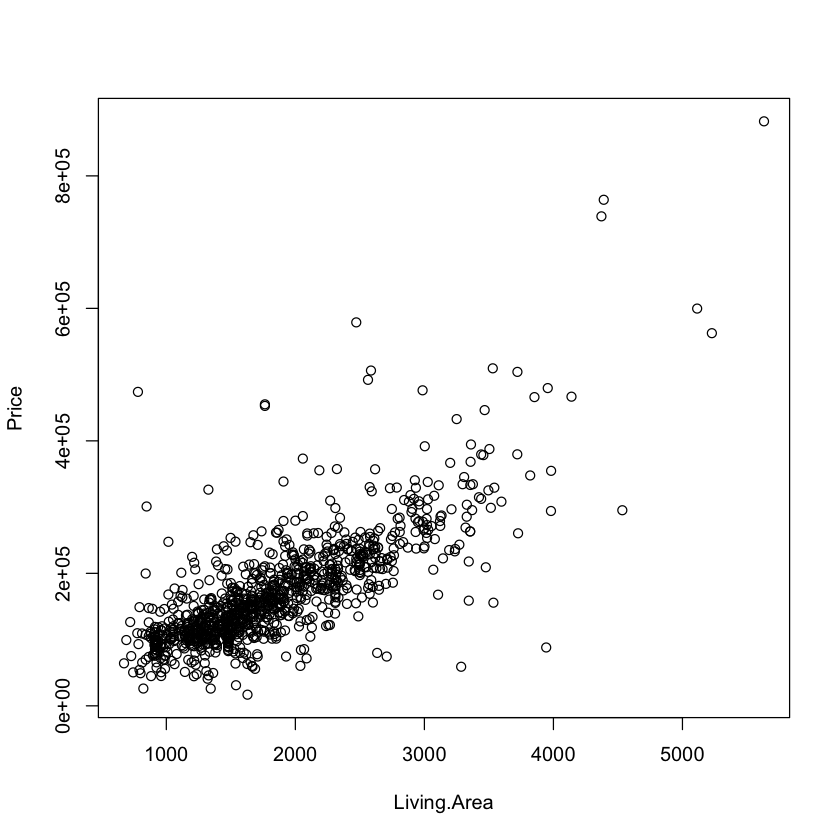

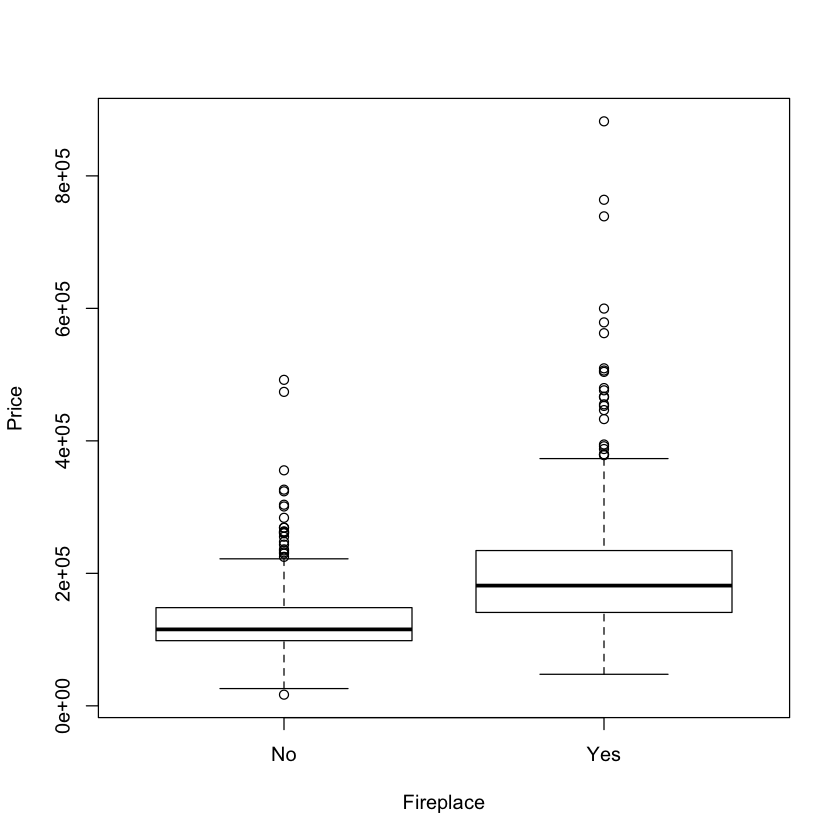

In [42]:
plot(Price ~ Living.Area + Fireplace, data=saratoga)

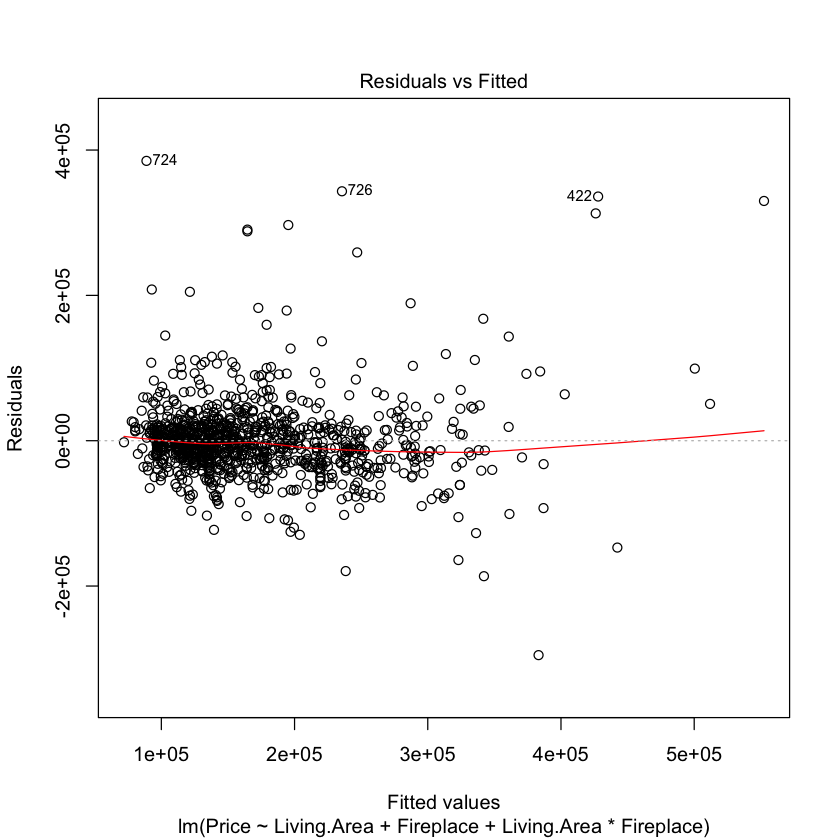

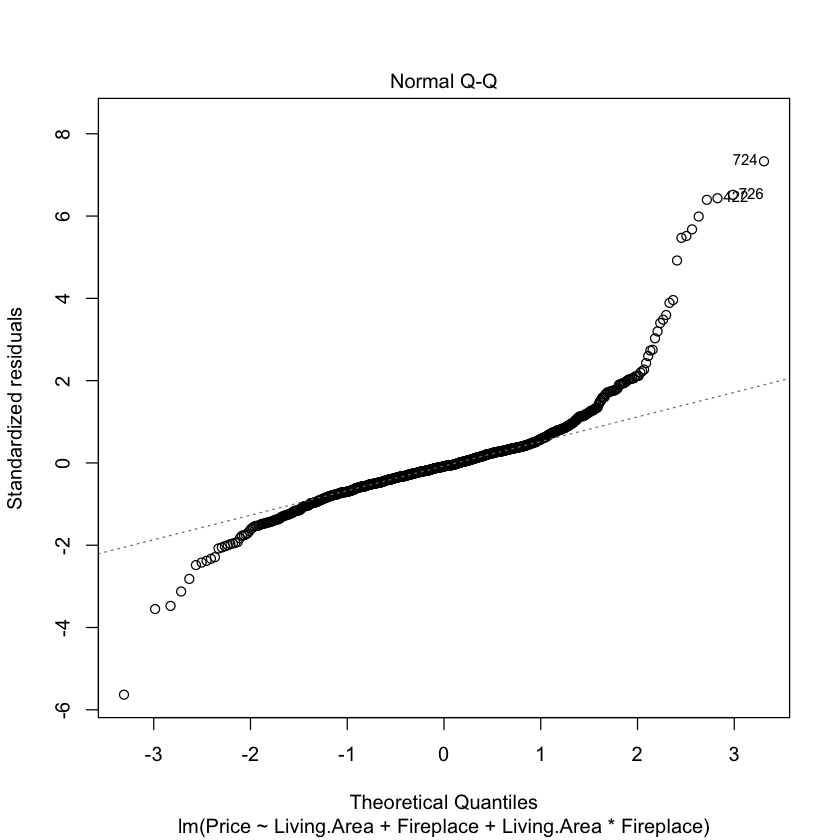

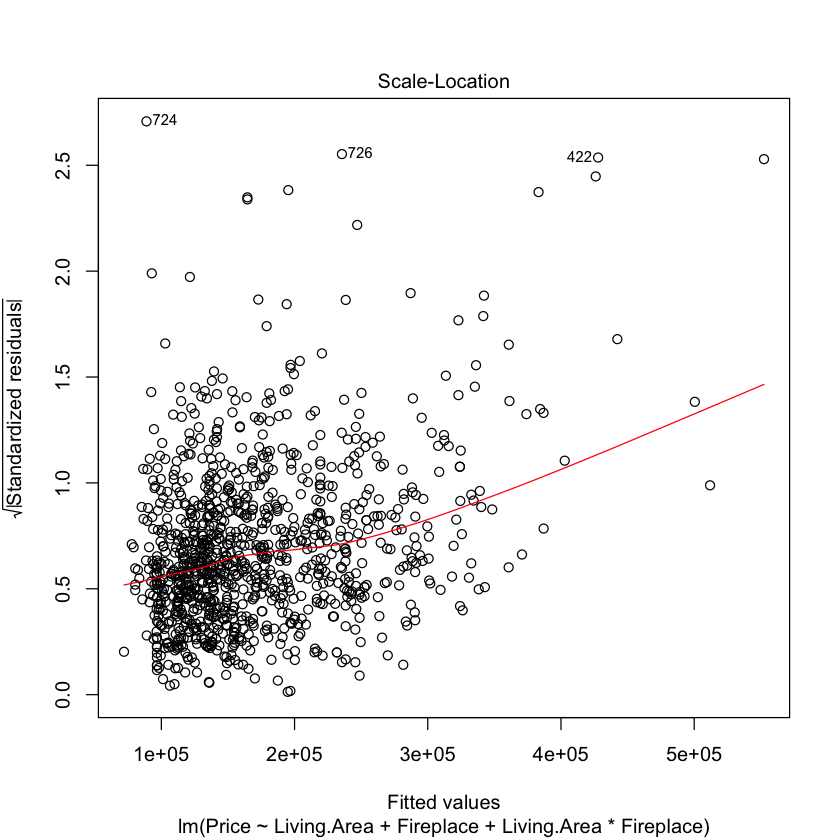

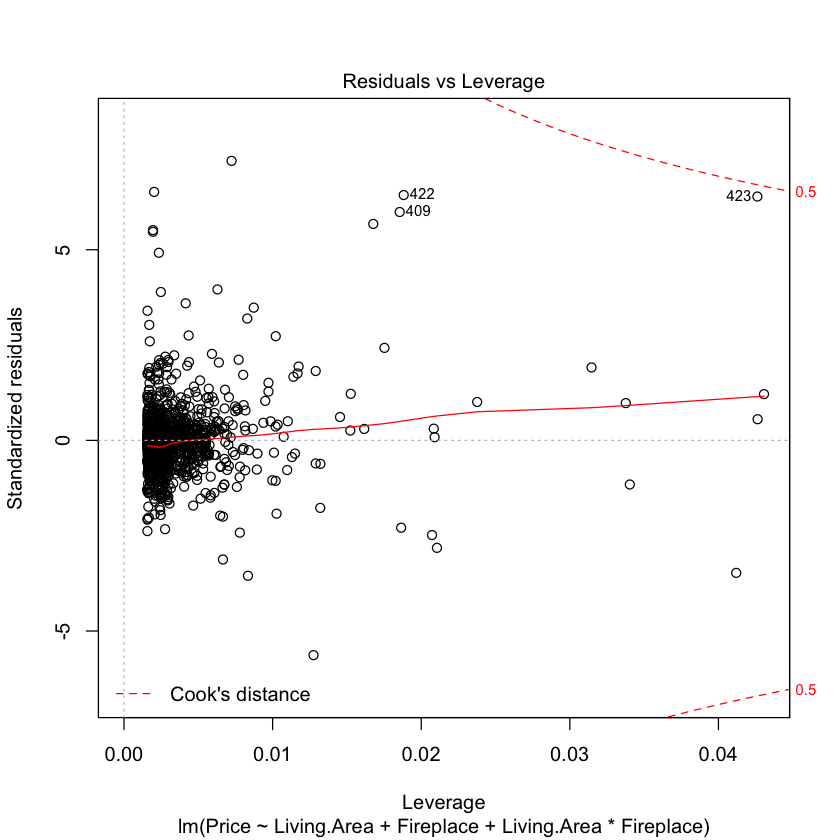

In [43]:
plot(model3)

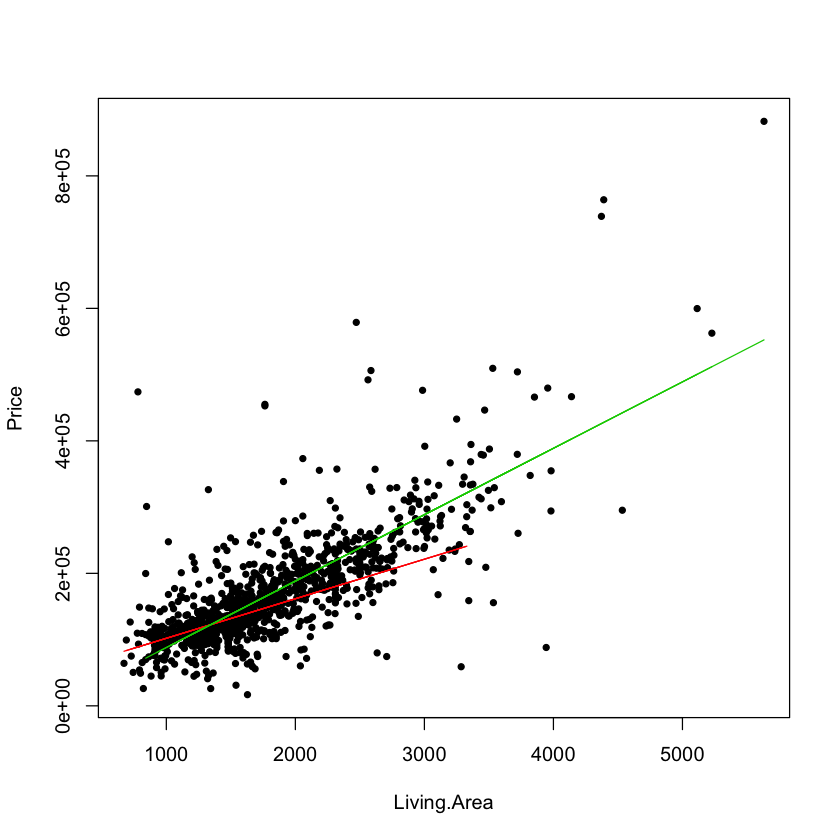

In [44]:
plot(Price~Living.Area, data=saratoga, pch=20);
points(saratoga$Living.Area[saratoga$Fireplace=='No'], model3$fitted.values[saratoga$Fireplace=='No'], type='l', col=2);
points(saratoga$Living.Area[saratoga$Fireplace=='Yes'], model3$fitted.values[saratoga$Fireplace=='Yes'], type='l', col=3);

The use of the * multiplication sign instead of : has unintended consequences for more than 2 variables because it creates every combination of interaction terms. That's how you get term interaction in R.

Given that a house has a fireplace a house fetches about $40 more per square feet

What interactions do is change slopes. The slope is different when including the interaction.

In [51]:
qplot(Living.Area, Price, data=saratoga, geom=c('point', 'smooth'), method='lm', facets=~Fireplace);

ERROR: Error: Unknown parameters: method


In [ ]:
?qplot